In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///c:/users/joseph/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Calculate the date 1 year ago from today

yr_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [11]:
results = session.query(Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs).\
            filter(Measurement.date >= yr_prior).\
            order_by(Measurement.date).all()

In [12]:
prcp_df = pd.DataFrame(results,columns=['date','prcp','station','tobs'])

In [13]:
prcp_df.head()

,date,prcp,station,tobs
0,2016-08-23,0.00,USC00519397,81.0
1,2016-08-23,0.15,USC00513117,76.0
2,2016-08-23,0.05,USC00514830,80.0
3,2016-08-23,NaN,USC00517948,80.0
4,2016-08-23,0.02,USC00519523,80.0


<IPython.core.display.Javascript object>


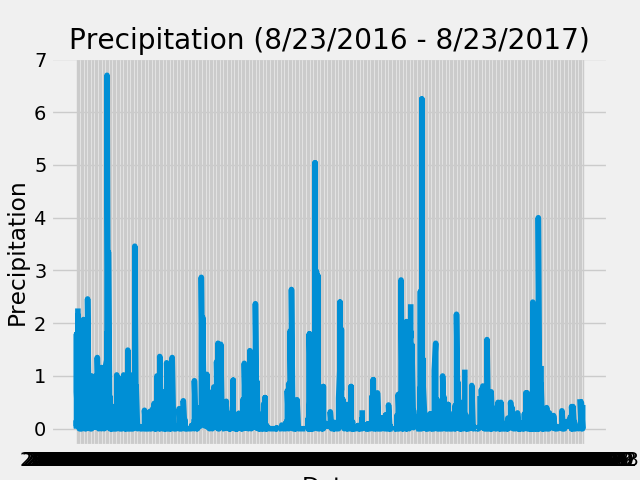

In [15]:
f1 = plt.figure(1)

plt.plot(prcp_df.date,prcp_df.prcp)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation (8/23/2016 - 8/23/2017)")

f1.show()


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [18]:
# How many stations are available in this dataset?

stations = session.query(Measurement.station).\
            group_by(Measurement.station).count()
stations

9

In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
       group_by(Measurement.station).\
       order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


tobs = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date >= yr_prior).\
            filter(Measurement.station == 'USC00519281').\
            order_by(Measurement.date).all()

In [22]:
tobs_df = pd.DataFrame(tobs,columns=['date','tobs'])

<IPython.core.display.Javascript object>


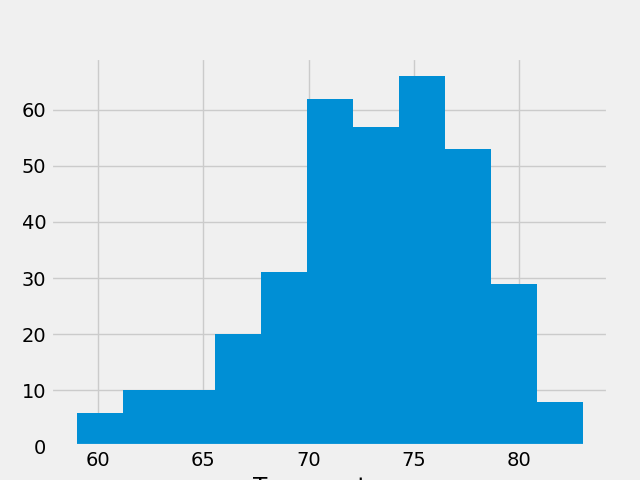

In [23]:
f2 = plt.figure(2)

plt.hist(tobs_df.tobs, bins=11)
plt.xlabel("Temperature")

f2.show()

In [25]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2016-08-23', '2017-08-23')

print(calc_temps('2016-08-23', '2017-08-23'))


[(58.0, 74.59058295964125, 87.0)]


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temps_df = pd.DataFrame(temps,columns=['Tmin','Tavg', 'Tmax'])



In [28]:

temp = ['temp']
x_pos = np.arange(len(temp))

max = temps_df.Tmax
min = temps_df.Tmin
avg = temps_df.Tavg

ptp = (max - min)/2
error = [ptp]

<IPython.core.display.Javascript object>


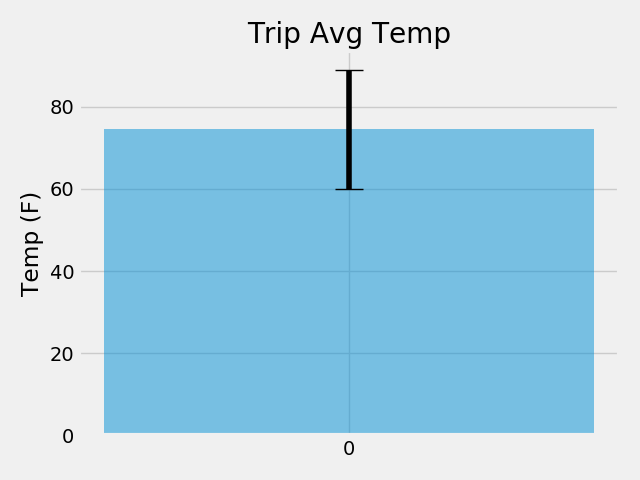

In [29]:

fig, ax = plt.subplots()
ax.bar(x_pos, avg, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temp (F)')
ax.set_xticks(x_pos)
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [31]:
station_total = session.query(Measurement.station, func.sum(Measurement.prcp)).\
            filter(Measurement.date >= yr_prior).\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()

In [32]:
station_df = pd.DataFrame(station_total,columns=['station','total_prcp'])

In [34]:
 
station_tbl = pd.read_sql("SELECT * FROM station", conn)

In [42]:
combined_data = pd.merge(station_df, station_tbl, on="station", how="outer")

In [43]:
combined_data.head()

,station,total_prcp,id,name,latitude,longitude,elevation
0,USC00516128,147.81,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,70.03,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,48.51,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,38.01,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,33.24,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
